In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")
sys.path.append('..')
import datetime as DT
import os
import rbf_functions

# Load model output for each activation function

In [6]:
rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

nfearchive = {}
for n in rbfs:
    nfearchive[n.__name__] = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    for i in os.listdir(output_dir):
        if i.endswith("_hypervolume.csv"):
            archives_by_nfe = pd.read_csv(output_dir + i)
            nfes = archives_by_nfe["Unnamed: 0"].values
            u_nfes = np.unique(nfes)
            selected_nfe = u_nfes[0::5]
            selected_nfe = np.append(selected_nfe, u_nfes[-1::])
            nfearchive[name][int(i.split("_")[0])] = archives_by_nfe.loc[archives_by_nfe['Unnamed: 0'].isin(selected_nfe)]

# Transform the dataframe back into platypus solution instances, to have a collection of solutions for each generation

In [24]:
from platypus import Solution, Problem, GenerationalDistance

n_rbfs = 4
n_objs = 6
n_vars = n_rbfs * 8 

problem = Problem(n_vars, n_objs)

# matters for hypervolume
problem.directions[0] = Problem.MAXIMIZE  # hydropower
problem.directions[1] = Problem.MAXIMIZE  # atomic power plant
problem.directions[2] = Problem.MAXIMIZE  # baltimore
problem.directions[3] = Problem.MAXIMIZE  # chester
problem.directions[4] = Problem.MINIMIZE  # environment
problem.directions[5] = Problem.MAXIMIZE  # recreation

archives = {}
seeds = np.arange(10, 101, 10).tolist()
for n in rbfs:
    archives[n.__name__] = {}
    for i in seeds:
        archives[n.__name__][i] = {}
for entry in rbfs:
    name = entry.__name__
    for s in nfearchive[name]: #nfearchive[name]:
        for nfe, generation in nfearchive[name][s].groupby("Unnamed: 0"):
            # we slice from 2, getting rid of the first two columns 
            # which contain the NFE and ID of each solution
            archive = []
            for i, row in generation.iloc[:, 2::].iterrows():
                solution = Solution(problem)
                solution.objectives = row
                archive.append(solution)
            archives[name][s][nfe] = archive
        

# load refsets for each rbf, turn into solutions sets

In [25]:
# load refsets for each rbf
ref_dir = "../refsets/"
ref_sets = {}
for n in rbfs:
    name = n.__name__
    ref_sets[name] = {}
    data = pd.read_csv(f'{ref_dir}{name}_refset.csv')  
    ref_set = []
    for i, row in data.iterrows():
        solution = Solution(problem)
        solution.objectives = row
        ref_set.append(solution)
    ref_sets[name] = ref_set

# Or, load global refset for all rbfs, turn into solution set

In [ ]:
# load refset for all rbfs
ref_dir = "./refsets/"
ref_sets = {}
data = pd.read_csv(f'{ref_dir}all_rbf_refset.csv')  
ref_set = []
for i, row in data.iterrows():
    solution = Solution(problem)
    solution.objectives = row
    ref_set.append(solution)

# Calculate generational distance

In [28]:
# gd = GenerationalDistance(reference_set=ref_set)
# nfes = []
# gds = []
# for nfe, archive in archives.items():
#     nfes.append(nfe)
#     gds.append(gd.calculate(archive))
    
tempnfe = {}
tempgd = {}
nfe_sets = {}
gd_sets = {}
for rbf in archives:
    nfe_sets[rbf] = {}
    gd_sets[rbf] = {}
    gd = GenerationalDistance(reference_set=ref_set)
#     gd = GenerationalDistance(reference_set=ref_sets[rbf])
    print(f"started {rbf} at {DT.datetime.now().strftime('%H:%M:%S')}")
    for seed in archives[rbf]:
        nfe_sets[rbf][seed] = {}
        gd_sets[rbf][seed] = {}
        s_archives = archives[rbf][seed]
        nfes = []
        gds = []
        for nfe, archive in s_archives.items():
            nfes.append(nfe)
            gds.append(gd.calculate(archive))
        nfe_sets[rbf][seed] = nfes
        gd_sets[rbf][seed] = gds
        tempnfe[seed] = nfes
        tempgd[seed] = gds
        dfgd = pd.DataFrame.from_dict(tempgd, orient='index')
        dfnfe = pd.DataFrame.from_dict(tempnfe, orient='index')
        dfgd = dfgd.T
        dfnfe = dfnfe.T
        dfgd.to_csv(f"gd/gd_all/{rbf}_gd_all.csv", index=False)
        dfnfe.to_csv(f"gd/gd_all/{rbf}_gd_nfe_all.csv", index=False)
        print(f"finished seed: {seed} at {DT.datetime.now().strftime('%H:%M:%S')}")

started original_rbf at 10:47:28
finished seed: 10 at 10:48:46
finished seed: 20 at 10:49:47
finished seed: 30 at 10:51:13
finished seed: 40 at 10:52:39
finished seed: 50 at 10:53:47
finished seed: 60 at 10:55:14
finished seed: 70 at 10:56:28
finished seed: 80 at 10:57:30
finished seed: 90 at 10:58:49
finished seed: 100 at 11:00:14
started squared_exponential_rbf at 11:00:14
finished seed: 10 at 11:01:15
finished seed: 20 at 11:02:42
finished seed: 30 at 11:03:26
finished seed: 40 at 11:04:32
finished seed: 50 at 11:05:36
finished seed: 60 at 11:06:53
finished seed: 70 at 11:08:26
finished seed: 80 at 11:09:29
finished seed: 90 at 11:10:34
finished seed: 100 at 11:11:35
started inverse_quadratic_rbf at 11:11:35
finished seed: 10 at 11:12:28
finished seed: 20 at 11:13:14
finished seed: 30 at 11:14:04
finished seed: 40 at 11:15:01
finished seed: 50 at 11:15:41
finished seed: 60 at 11:16:25
finished seed: 70 at 11:17:30
finished seed: 80 at 11:18:24
finished seed: 90 at 11:19:20
finished 

# Plot results

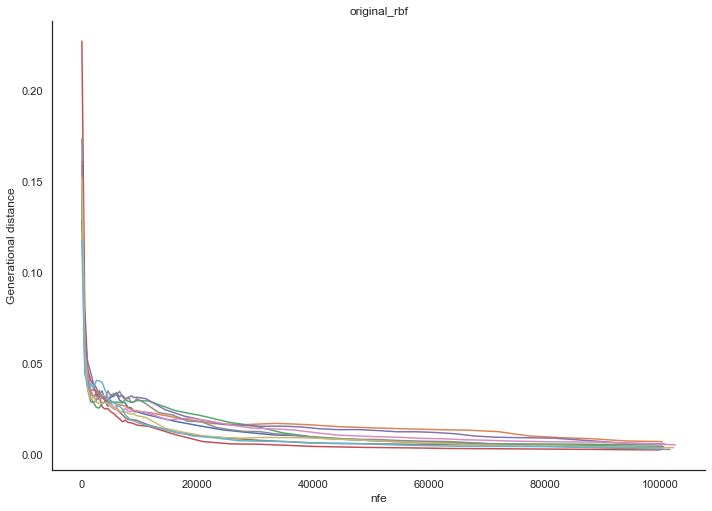

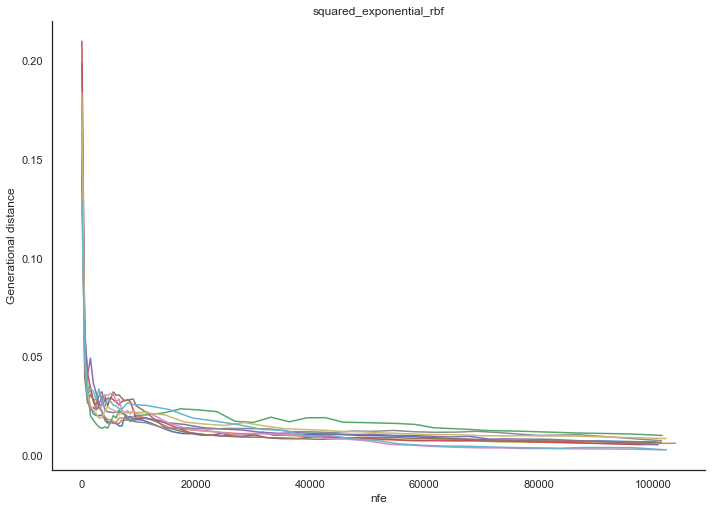

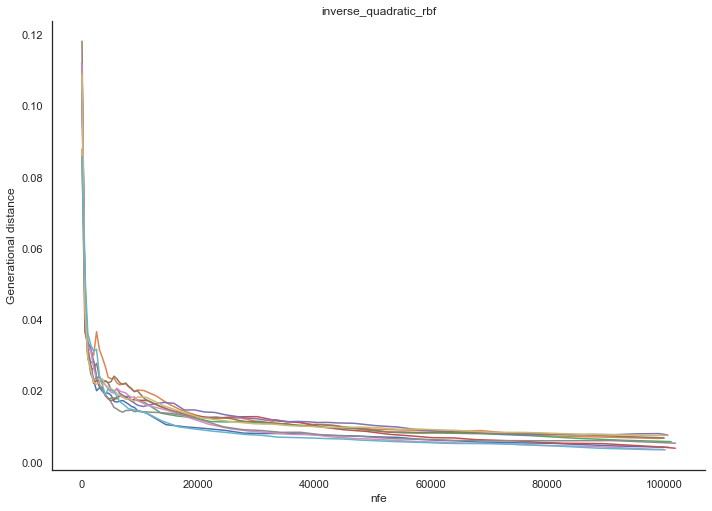

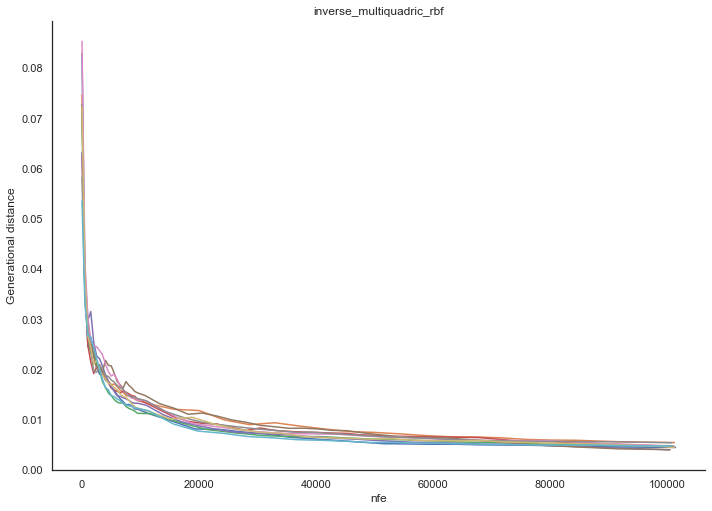

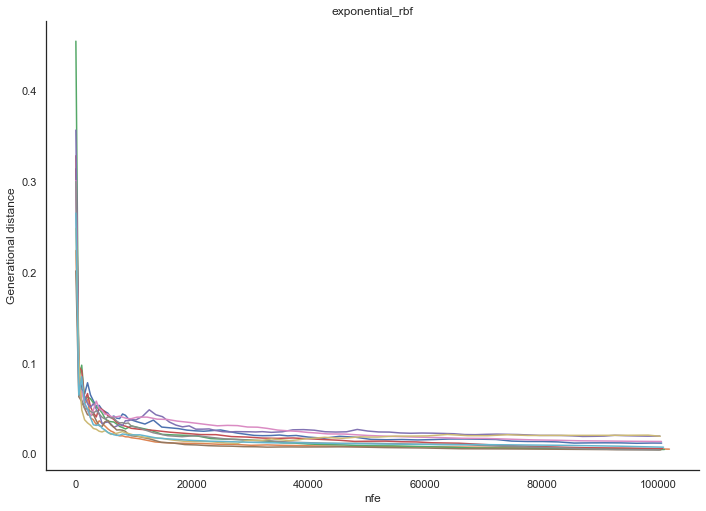

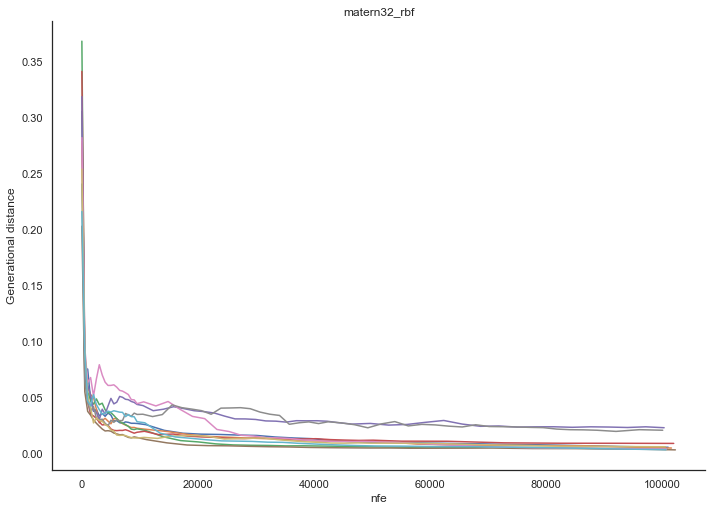

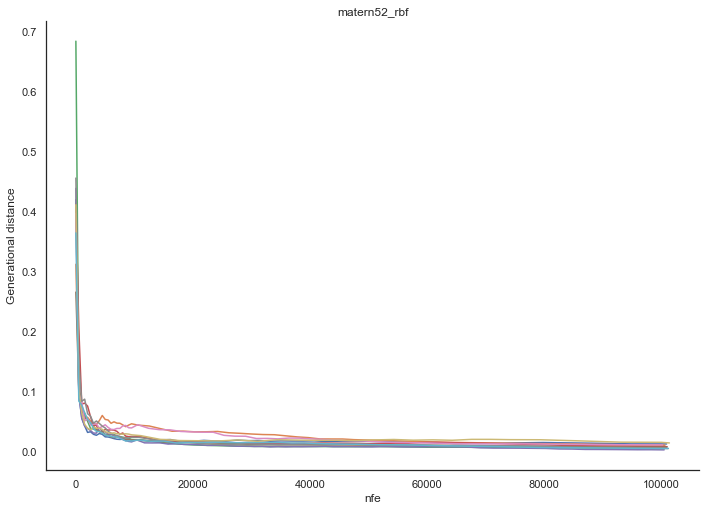

In [21]:
sns.set_style("white")
for entry in rbfs:
    name = entry.__name__
    gd = pd.DataFrame.from_dict(gd_sets[name], orient='index').T
    nfe = pd.DataFrame.from_dict(nfe_sets[name], orient='index').T
    
    fig, ax = plt.subplots()
    ax.plot(nfe, gd)
    ax.set_xlabel('nfe')
    ax.set_ylabel('Generational distance')
    ax.set_title(name)
    sns.despine()

    plt.show()

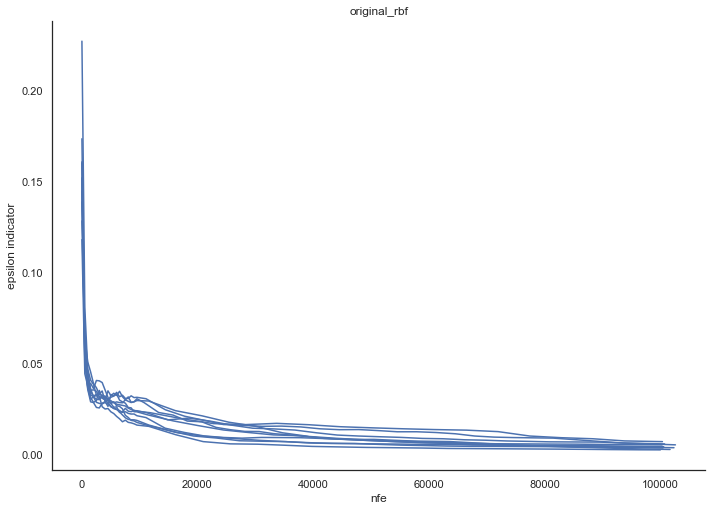

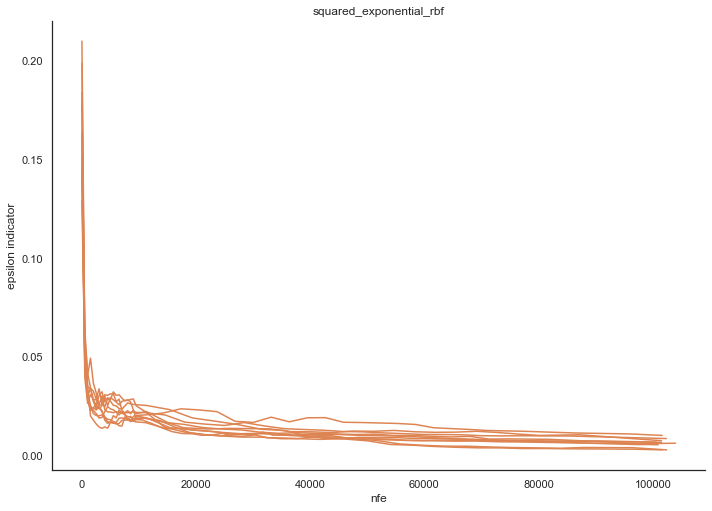

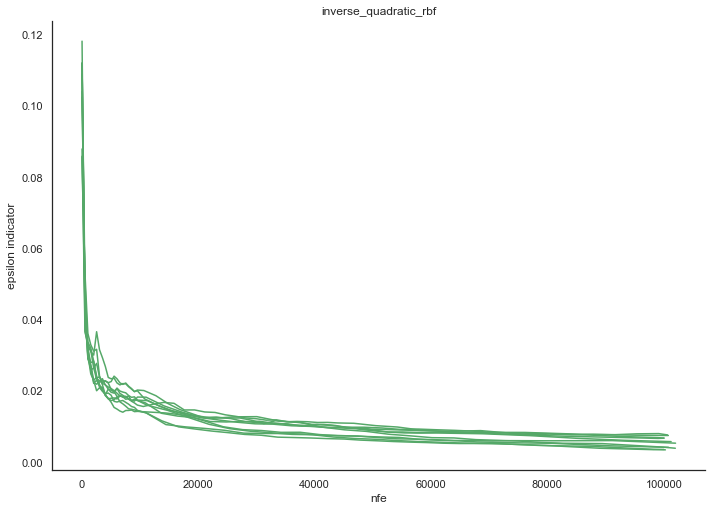

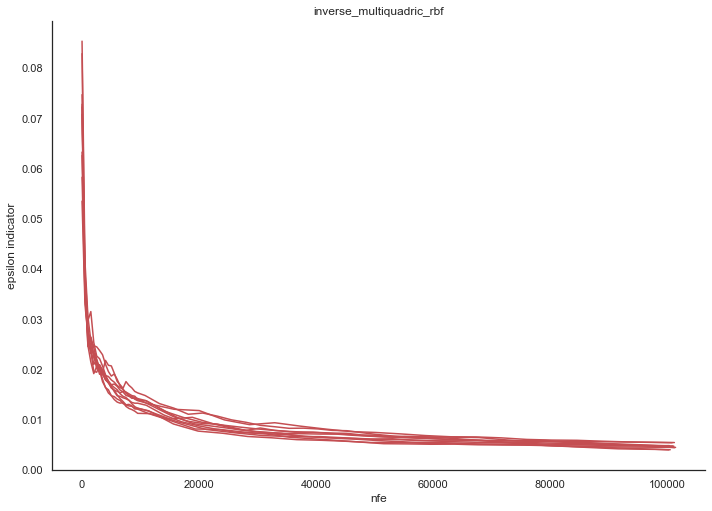

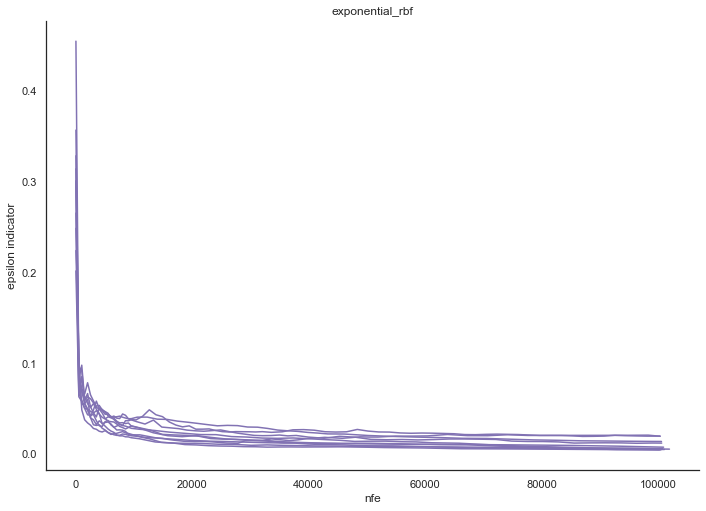

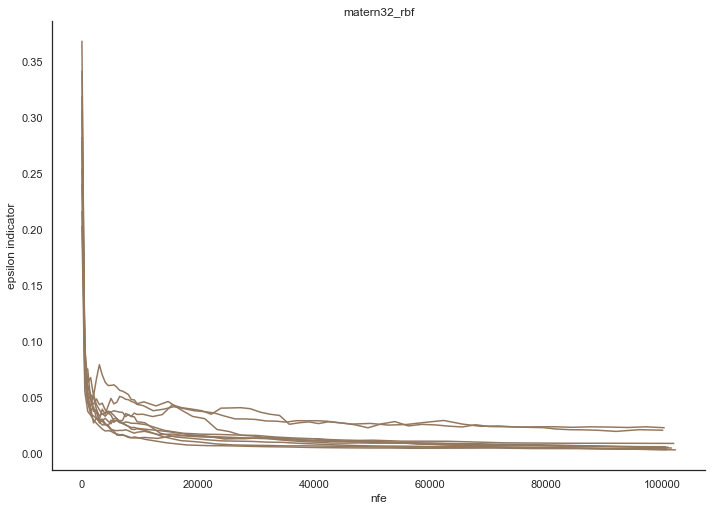

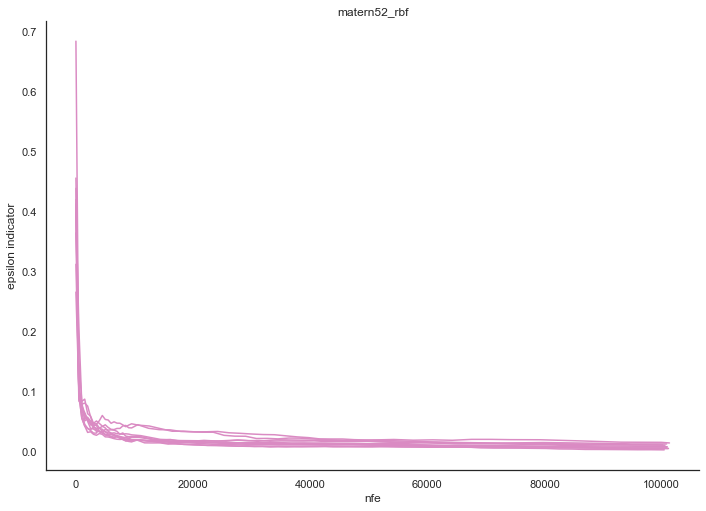

In [7]:
for entry, c in zip(rbfs, sns.color_palette()):
    rbf = entry.__name__
    df_gd = pd.read_csv(f"gd/{rbf}_gd.csv")
    df_gd_nfe = pd.read_csv(f"gd/{rbf}_gd_nfe.csv")
    fig, ax = plt.subplots(sharex=True)

    ax.plot(df_gd_nfe, df_gd, color=c)

    ax.set_xlabel('nfe')
    ax.set_ylabel('epsilon indicator')
    ax.set_title(rbf)
    sns.despine()
    plt.savefig(f'figs/{rbf}/{rbf}_gd.png')
plt.show()